## Infinite Row of Vorticies

In [1]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [73]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)

In [110]:
#vortex properties
gamma = 5.0
Nvortex = 1000
a = .5
y_vortex = 0.0
x_vortex = numpy.linspace(-(Nvortex/2)*a,(Nvortex/2)*a, Nvortex)

In [118]:
x_vortex

array([-250.        , -249.4994995 , -248.998999  , -248.4984985 ,
       -247.997998  , -247.4974975 , -246.996997  , -246.4964965 ,
       -245.995996  , -245.4954955 , -244.99499499, -244.49449449,
       -243.99399399, -243.49349349, -242.99299299, -242.49249249,
       -241.99199199, -241.49149149, -240.99099099, -240.49049049,
       -239.98998999, -239.48948949, -238.98898899, -238.48848849,
       -237.98798799, -237.48748749, -236.98698699, -236.48648649,
       -235.98598599, -235.48548549, -234.98498498, -234.48448448,
       -233.98398398, -233.48348348, -232.98298298, -232.48248248,
       -231.98198198, -231.48148148, -230.98098098, -230.48048048,
       -229.97997998, -229.47947948, -228.97897898, -228.47847848,
       -227.97797798, -227.47747748, -226.97697698, -226.47647648,
       -225.97597598, -225.47547548, -224.97497497, -224.47447447,
       -223.97397397, -223.47347347, -222.97297297, -222.47247247,
       -221.97197197, -221.47147147, -220.97097097, -220.47047

In [112]:
u = v = psi = numpy.zeros((N,N), dtype = float)

In [113]:
def get_velocity_vortex(strength, xv, yv, X, Y):

    u = +strength / (2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength / (2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [114]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength / (4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [115]:
for i in range (0,Nvortex):
    #finding velocity field
    u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex[i], y_vortex, X, Y)
    
    #find stream function
    psi_vortex = get_stream_function_vortex(gamma, x_vortex[i], y_vortex, X, Y)
    
    u = u + u_vortex
    v = v + v_vortex
    psi = psi + psi_vortex

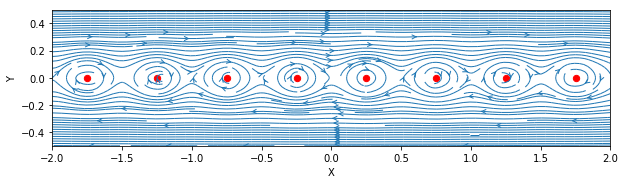

In [119]:
#plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, numpy.zeros(x_vortex.size,), color='r', s=40, marker='o');